## Exercicios - Python para Engnharia de Dados

____

### Trabalhando com Pandas
...

Importe, para um dataframe Pandas, o conteúdo do arquivo jogadores.csv <br>
Mostre o conteúdo do dataframe criado<br>
Remova do dataframe os jogadores que possuem o salário nulo<br>
Crie, no dataframe, uma nova coluna, salario_anual, contendo o salário anual de todos os jogadores<br>
Atualize o nome dos jogadores, passando todos os caracteres para maiúsculo<br>
Mostre os dados estatísticos dos valores numéricos do dataframe (comando describe).<br>
Descreva as informações sobre os salários dos jogadores, obtidas através desses dados.<br>
Faça consultas no dataframe para exibir:
- Nome e time dos jogadores que possuem salário acima de R$ 200000,00
- Nome e salário dos jogadores dos times de Minas Gerais (estado MG)
- Nome e time dos jogadores cujo nome contenha a letra 'u'
- Nome, salário e time dos jogadores, ordenados pelo salário em ordem decrescente
- Nome, salário e time dos jogadores, ordenados pelo nome do time em ordem crescente, e em seguida pelo salário em ordem decrescente
- A quantidade de jogadores por time
- A média salarial por time<br>

Exporte o conteúdo do dataframe para um novo arquivo CSV, nomeado novo_time.csv<br>
Gere um gráfico de barras exibindo a quantidade de jogadores por posição<br>


In [2]:
import pandas as pd
import urllib.request

file_url = 'https://github.com/Adrianogvs/014-Pos-Graduacao-Engenharia-de-Dados/raw/main/data/jogadores.csv'
file_path = 'jogadores.csv'

# Baixar o arquivo CSV
urllib.request.urlretrieve(file_url, file_path)

# Ler o arquivo CSV
jogador = pd.read_csv(file_path, encoding='utf-8', delimiter=';')
jogador.describe()


,salario
count,4.00000
mean,312500.00000
std,359107.69044
min,100000.00000
25%,137500.00000
50%,150000.00000
75%,325000.00000
max,850000.00000


In [4]:
# Mostre o conteúdo do dataframe criado
jogador

,jogador,time,posicao,salario
0,Everson,Atlético,Goleiro,150000.0
1,Incrível Hulk,Atlético,Atacante,850000.0
2,Fábio,Cruzeiro,Goleiro,100000.0
3,Edu,Cruzeiro,Atacante,150000.0
4,Diego Tardeli,NaN,Atacante,NaN


In [13]:
# Remova do dataframe os jogadores que possuem o salário nulo
jogador = jogador.dropna(subset=['salario'])
jogador


,jogador,time,posicao,salario
0,Everson,Atlético,Goleiro,150000.0
1,Incrível Hulk,Atlético,Atacante,850000.0
2,Fábio,Cruzeiro,Goleiro,100000.0
3,Edu,Cruzeiro,Atacante,150000.0


In [16]:
# Crie, no dataframe, uma nova coluna, salario_anual, contendo o salário anual de todos os jogadores
jogador['salario_anual'] = jogador['salario'] * 12
jogador

,jogador,time,posicao,salario,salario_anual
0,Everson,Atlético,Goleiro,150000.0,1800000.0
1,Incrível Hulk,Atlético,Atacante,850000.0,10200000.0
2,Fábio,Cruzeiro,Goleiro,100000.0,1200000.0
3,Edu,Cruzeiro,Atacante,150000.0,1800000.0


In [23]:
# Atualize o nome dos jogadores, passando todos os caracteres para maiúsculo
jogador['jogador'] = jogador['jogador'].str.upper()
jogador

,jogador,time,posicao,salario,salario_anual
0,EVERSON,Atlético,Goleiro,150000.0,1800000.0
1,INCRÍVEL HULK,Atlético,Atacante,850000.0,10200000.0
2,FÁBIO,Cruzeiro,Goleiro,100000.0,1200000.0
3,EDU,Cruzeiro,Atacante,150000.0,1800000.0


In [24]:
# Mostre os dados estatísticos dos valores numéricos do dataframe (comando describe).
print(jogador.describe())


            salario  salario_anual
count       4.00000   4.000000e+00
mean   312500.00000   3.750000e+06
std    359107.69044   4.309292e+06
min    100000.00000   1.200000e+06
25%    137500.00000   1.650000e+06
50%    150000.00000   1.800000e+06
75%    325000.00000   3.900000e+06
max    850000.00000   1.020000e+07


In [26]:
# Descreva as informações sobre os salários dos jogadores, obtidas através desses dados.
salario_info = jogador['salario'].describe()
print(salario_info)

count         4.00000
mean     312500.00000
std      359107.69044
min      100000.00000
25%      137500.00000
50%      150000.00000
75%      325000.00000
max      850000.00000
Name: salario, dtype: float64


In [28]:
# - Nome e time dos jogadores que possuem salário acima de R$ 200000,00
salario_acima_200k = jogador[jogador['salario'] > 200000.00]
print(salario_acima_200k[['jogador', 'time']])


         jogador      time
1  INCRÍVEL HULK  Atlético


In [30]:
# Nome e salário dos jogadores dos times de Minas Gerais (estado MG):
jogadores_mg = jogador[jogador['time'] == 'Minas Gerais']
print(jogadores_mg[['jogador', 'salario']])


Empty DataFrame
Columns: [jogador, salario]
Index: []


In [31]:
# Nome e time dos jogadores cujo nome contenha a letra 'u':
jogadores_com_u = jogador[jogador['jogador'].str.contains('u', case=False)]
print(jogadores_com_u[['jogador', 'time']])


         jogador      time
1  INCRÍVEL HULK  Atlético
3            EDU  Cruzeiro


In [32]:
# Nome, salário e time dos jogadores, ordenados pelo salário em ordem decrescente:
jogadores_ordem_salario = jogador.sort_values('salario', ascending=False)
print(jogadores_ordem_salario[['jogador', 'salario', 'time']])


         jogador   salario      time
1  INCRÍVEL HULK  850000.0  Atlético
0        EVERSON  150000.0  Atlético
3            EDU  150000.0  Cruzeiro
2          FÁBIO  100000.0  Cruzeiro


In [33]:
# Nome, salário e time dos jogadores, ordenados pelo nome do time em ordem crescente, e em seguida pelo salário em ordem decrescente:
jogadores_ordem_time_salario = jogador.sort_values(['time', 'salario'], ascending=[True, False])
print(jogadores_ordem_time_salario[['jogador', 'salario', 'time']])


         jogador   salario      time
1  INCRÍVEL HULK  850000.0  Atlético
0        EVERSON  150000.0  Atlético
3            EDU  150000.0  Cruzeiro
2          FÁBIO  100000.0  Cruzeiro


In [34]:
# A quantidade de jogadores por time:
quantidade_jogadores_time = jogador['time'].value_counts()
print(quantidade_jogadores_time)


Atlético    2
Cruzeiro    2
Name: time, dtype: int64


In [35]:
# A média salarial por time:
media_salario_time = jogador.groupby('time')['salario'].mean()
print(media_salario_time)


time
Atlético    500000.0
Cruzeiro    125000.0
Name: salario, dtype: float64


In [36]:
# Exporte o conteúdo do dataframe para um novo arquivo CSV, nomeado novo_time.csv
novo_arquivo = 'novo_time.csv'
jogador.to_csv(novo_arquivo, index=False)

print("O arquivo 'novo_time.csv' foi criado com sucesso.")

O arquivo 'novo_time.csv' foi criado com sucesso.


In [37]:
jogador

,jogador,time,posicao,salario,salario_anual
0,EVERSON,Atlético,Goleiro,150000.0,1800000.0
1,INCRÍVEL HULK,Atlético,Atacante,850000.0,10200000.0
2,FÁBIO,Cruzeiro,Goleiro,100000.0,1200000.0
3,EDU,Cruzeiro,Atacante,150000.0,1800000.0


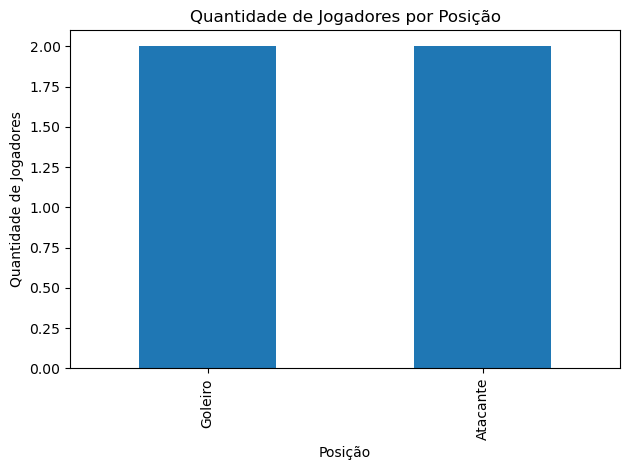

In [42]:
import matplotlib.pyplot as plt

# Gere um gráfico de barras exibindo a quantidade de jogadores por posição
# Contar a quantidade de jogadores por posição
contagem_posicao = jogador['posicao'].value_counts()

# Gerar o gráfico de barras
contagem_posicao.plot(kind='bar')

plt.xlabel('Posição')
plt.ylabel('Quantidade de Jogadores')
plt.title('Quantidade de Jogadores por Posição')

plt.tight_layout()  # Ajusta automaticamente os espaçamentos
plt.show()